In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import seaborn as sns

## Load Data and Use Relevant Cols

In [8]:
df = pd.read_csv('../../../data/processed_data/df_matching.csv')
df.head()

,State Abbreviation,Name,Release Year,High school graduation raw value,Unemployment raw value,Some college raw value,Ratio of population to mental health providers,Median household income raw value,Average Temperature,Average Precipitation,RUCC,Poor mental health days raw value,Crude Rate,high_school_treated,unemployment_treated,college_treated,mental_health_provider_treated,household_income_treated,temperature_treated,precipitation_treated
0,AL,Autauga County,2011,0.740,0.089,0.554,50354.0,51622.0,64.658333,3.769167,2.0,4.1,21.7,0,0,0,0,1,0,0
1,AL,Baldwin County,2011,0.681,0.088,0.615,6076.0,51957.0,67.733333,3.720833,3.0,4.1,18.2,0,0,1,0,1,0,0
2,AL,Calhoun County,2011,0.689,0.101,0.499,9452.0,39997.0,62.325000,4.231667,3.0,4.8,14.4,0,0,0,0,0,0,0
3,AL,Cullman County,2011,0.684,0.094,0.460,20380.0,39276.0,61.333333,5.382500,4.0,4.8,17.4,0,0,0,0,0,0,0
4,AL,Etowah County,2011,0.702,0.105,0.561,10344.0,37264.0,62.100000,4.965000,3.0,4.4,24.0,0,0,0,0,0,0,0


## Step 2: Identify Col needed

In [9]:
categorize_treatment = "unemployment_treated"

In [107]:
df[df[categorize_treatment]==0].describe()

,Release Year,High school graduation raw value,Unemployment raw value,Some college raw value,Ratio of population to mental health providers,Median household income raw value,Average Temperature,Average Precipitation,RUCC,Poor mental health days raw value,Crude Rate,high_school_treated,unemployment_treated,college_treated,mental_health_provider_treated,household_income_treated,temperature_treated,precipitation_treated
count,2236.000000,2227.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2233.000000,2236.000000,2236.000000,2236.0,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000
mean,2012.684258,0.785863,0.101516,0.568539,7319.205266,47165.002236,56.827516,3.583015,2.604204,3.702642,17.130322,0.396691,0.0,0.360465,0.321109,0.368962,0.485242,0.460644
std,1.538046,0.095522,0.022975,0.086649,10774.629513,9973.336462,7.968342,1.502359,1.561666,0.654107,7.934925,0.489320,0.0,0.480243,0.467007,0.482632,0.499894,0.498560
min,2011.000000,0.185000,0.077875,0.307826,73.229508,27268.000000,26.208333,0.184167,1.000000,1.800000,4.300000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2011.000000,0.728000,0.085237,0.506579,1563.156250,40485.000000,50.731250,2.850625,1.000000,3.300000,11.900000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2012.000000,0.797000,0.096000,0.571322,3880.398706,45001.000000,56.166667,3.601250,2.000000,3.600000,15.500000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2013.000000,0.852849,0.111000,0.628139,8256.000000,52030.250000,62.193750,4.462708,3.000000,4.100000,20.400000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000
max,2016.000000,1.000000,0.297000,0.831032,89701.000000,89909.000000,78.383333,10.926667,9.000000,7.000000,98.500000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
df[df[categorize_treatment]==1].describe()

,Release Year,High school graduation raw value,Unemployment raw value,Some college raw value,Ratio of population to mental health providers,Median household income raw value,Average Temperature,Average Precipitation,RUCC,Poor mental health days raw value,Crude Rate,high_school_treated,unemployment_treated,college_treated,mental_health_provider_treated,household_income_treated,temperature_treated,precipitation_treated
count,2235.000000,2223.000000,2235.000000,2235.000000,2235.000000,2235.000000,2235.000000,2235.000000,2235.000000,2229.000000,2235.000000,2235.000000,2235.0,2235.000000,2235.000000,2235.000000,2235.000000,2235.000000
mean,2014.308277,0.831878,0.061508,0.636310,3202.958840,55450.999105,56.117040,3.470569,2.441611,3.445312,17.094228,0.610738,1.0,0.639821,0.678747,0.631320,0.514541,0.539150
std,1.810716,0.080272,0.010854,0.099068,7600.239015,14460.364179,8.372763,1.259953,1.489313,0.637074,7.158653,0.487692,0.0,0.480160,0.467062,0.482555,0.499900,0.498576
min,2011.000000,0.266667,0.017000,0.338000,115.218750,30880.000000,24.250000,0.393333,1.000000,1.800000,4.700000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2013.000000,0.784637,0.054000,0.566348,575.114944,45072.500000,49.779167,2.824583,1.000000,3.000000,12.050000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2015.000000,0.844232,0.062913,0.640265,1117.537634,51958.000000,55.433333,3.429167,2.000000,3.400000,15.800000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000
75%,2016.000000,0.891000,0.070389,0.707539,2774.105263,61567.500000,62.187500,4.183750,3.000000,3.800000,20.600000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000
max,2016.000000,1.000000,0.077785,0.883019,106755.000000,122641.000000,78.566667,9.967500,9.000000,6.500000,64.100000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:xlabel='High school graduation raw value', ylabel='Count'>

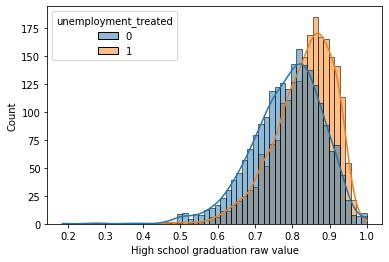

In [12]:
sns.histplot(data=df, x="High school graduation raw value", hue=categorize_treatment, kde=True)

<AxesSubplot:xlabel='Some college raw value', ylabel='Count'>

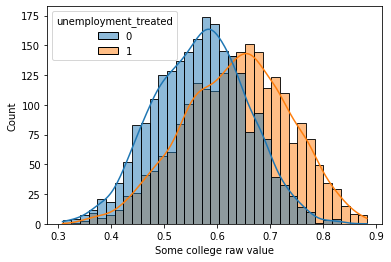

In [13]:
sns.histplot(data=df, x="Some college raw value", hue=categorize_treatment, kde=True)

<AxesSubplot:xlabel='Unemployment raw value', ylabel='Count'>

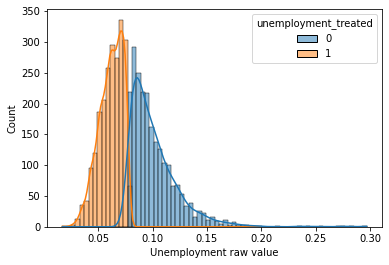

In [14]:
sns.histplot(data=df, x="Unemployment raw value", hue=categorize_treatment, kde=True)

<AxesSubplot:xlabel='Median household income raw value', ylabel='Count'>

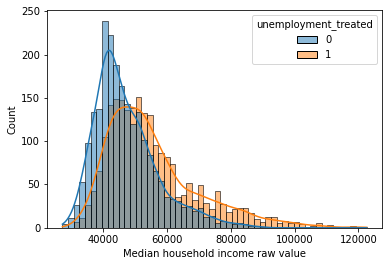

In [15]:
sns.histplot(data=df, x="Median household income raw value", hue=categorize_treatment, kde=True)

<AxesSubplot:xlabel='Poor mental health days raw value', ylabel='Count'>

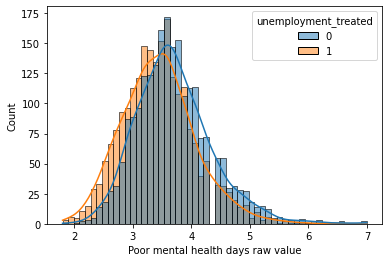

In [16]:
sns.histplot(data=df, x="Poor mental health days raw value", hue=categorize_treatment, kde=True)

<AxesSubplot:xlabel='Crude Rate', ylabel='Count'>

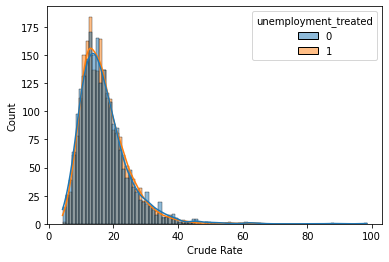

In [17]:
sns.histplot(data=df, x="Crude Rate", hue=categorize_treatment, kde=True)

In [18]:
df[categorize_treatment].value_counts()

0    2236
1    2235
Name: unemployment_treated, dtype: int64

# Unadjusted ATE

In [21]:
# Unadjusted ATE - Poor mental health days
poor_mental_treated = df[df[categorize_treatment]== 1]['Poor mental health days raw value'].mean()
poor_mental_untreated = df[df[categorize_treatment]== 0]['Poor mental health days raw value'].mean()
print("Higher unemployment = {:0.3f}".format(poor_mental_untreated))
print("Lower unemployment = {:0.3f}".format(poor_mental_treated))
print('Difference in Sample Averages = {:0.3f}'.format(poor_mental_treated - poor_mental_untreated))

Higher unemployment = 3.703
Lower unemployment = 3.445
Difference in Sample Averages = -0.257


In [22]:
# Unadjusted ATE - Suicide rate
poor_mental_treated = df[df[categorize_treatment]== 1]['Crude Rate'].mean()
poor_mental_untreated = df[df[categorize_treatment]== 0]['Crude Rate'].mean()
print("Higher unemployment = {:0.3f}".format(poor_mental_untreated))
print("Lower unemployment = {:0.3f}".format(poor_mental_treated))
print('Difference in Sample Averages = {:0.3f}'.format(poor_mental_treated - poor_mental_untreated))

Higher unemployment = 17.130
Lower unemployment = 17.094
Difference in Sample Averages = -0.036


In [23]:
def OLS_estimate(outcome, covariates):
    covariates = sm.add_constant(covariates) # adding a constant 
    model = sm.OLS(outcome, covariates)
    result = model.fit()
    print(result.summary())

In [28]:
OLS_estimate(df['Poor mental health days raw value'], df[categorize_treatment])

                                    OLS Regression Results                                   
Dep. Variable:     Poor mental health days raw value   R-squared:                         nan
Model:                                           OLS   Adj. R-squared:                    nan
Method:                                Least Squares   F-statistic:                       nan
Date:                               Thu, 02 Dec 2021   Prob (F-statistic):                nan
Time:                                       21:31:37   Log-Likelihood:                    nan
No. Observations:                               4471   AIC:                               nan
Df Residuals:                                   4469   BIC:                               nan
Df Model:                                          1                                         
Covariance Type:                           nonrobust                                         
                           coef    std err          t      P

### 1. Remove null poor mental health days

In [36]:
null_vals = df['Poor mental health days raw value'].isna()
df[null_vals]

,State Abbreviation,Name,Release Year,High school graduation raw value,Unemployment raw value,Some college raw value,Ratio of population to mental health providers,Median household income raw value,Average Temperature,Average Precipitation,RUCC,Poor mental health days raw value,Crude Rate,high_school_treated,unemployment_treated,college_treated,mental_health_provider_treated,household_income_treated,temperature_treated,precipitation_treated
2427,TX,Fannin County,2013,0.957000,0.099000,0.426858,33926.000000,39985.0,63.000000,3.188333,6.0,NaN,29.7,1,0,0,0,0,0,1
2796,IL,Mason County,2015,0.808539,0.110471,0.557579,3562.000000,45563.0,53.333333,3.941667,6.0,NaN,87.7,0,0,0,0,0,1,0
3349,TX,Comal County,2015,0.926501,0.061348,0.665186,1048.495575,70322.0,68.308333,4.252500,1.0,NaN,14.7,1,1,1,1,1,0,0
3356,TX,Fannin County,2015,0.936605,0.084769,0.477129,961.685714,42392.0,64.566667,6.019167,6.0,NaN,29.7,1,0,0,1,0,0,0
3368,TX,Hill County,2015,0.932789,0.062120,0.491212,3869.222222,40253.0,66.375000,5.273333,6.0,NaN,28.7,1,1,0,0,0,0,0
3369,TX,Hood County,2015,0.956571,0.050606,0.574259,1175.666667,59053.0,65.575000,4.843333,1.0,NaN,18.1,1,1,0,1,1,0,0
3374,TX,Kendall County,2015,0.986997,0.051804,0.666250,839.244444,75860.0,66.883333,3.857500,1.0,NaN,27.2,1,1,1,1,1,0,0
3381,TX,Navarro County,2015,0.907617,0.070629,0.465108,1921.520000,38423.0,66.925000,6.321667,4.0,NaN,33.2,1,1,0,1,0,0,0
3388,TX,Rockwall County,2015,0.943677,0.058108,0.706581,1107.077922,92466.0,65.500000,5.522500,1.0,NaN,14.3,1,1,1,1,1,0,0


In [37]:
# Store rows without null values
df_mental = df[~null_vals]

In [38]:
# Try again
OLS_estimate(df_mental['Poor mental health days raw value'], df_mental[categorize_treatment])

                                    OLS Regression Results                                   
Dep. Variable:     Poor mental health days raw value   R-squared:                       0.038
Model:                                           OLS   Adj. R-squared:                  0.038
Method:                                Least Squares   F-statistic:                     177.2
Date:                               Thu, 02 Dec 2021   Prob (F-statistic):           1.12e-39
Time:                                       21:40:44   Log-Likelihood:                -4378.2
No. Observations:                               4462   AIC:                             8760.
Df Residuals:                                   4460   BIC:                             8773.
Df Model:                                          1                                         
Covariance Type:                           nonrobust                                         
                           coef    std err          t      P

In [25]:
OLS_estimate(df['Crude Rate'], df[categorize_treatment])

                            OLS Regression Results                            
Dep. Variable:             Crude Rate   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                   0.02550
Date:                Thu, 02 Dec 2021   Prob (F-statistic):              0.873
Time:                        21:29:43   Log-Likelihood:                -15385.
No. Observations:                4471   AIC:                         3.077e+04
Df Residuals:                    4469   BIC:                         3.079e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   17.1303 

In [29]:
df.groupby(categorize_treatment)['Crude Rate', 'Poor mental health days raw value', 'High school graduation raw value', 'Unemployment raw value', 'Some college raw value', 'Ratio of population to mental health providers', 'Median household income raw value', 'Average Precipitation', 'RUCC'].agg(['mean'])

C:\Users\alnli\AppData\Local\Temp/ipykernel_35484/729638201.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(categorize_treatment)['Crude Rate', 'Poor mental health days raw value', 'High school graduation raw value', 'Unemployment raw value', 'Some college raw value', 'Ratio of population to mental health providers', 'Median household income raw value', 'Average Precipitation', 'RUCC'].agg(['mean'])


,Crude Rate,Poor mental health days raw value,High school graduation raw value,Unemployment raw value,Some college raw value,Ratio of population to mental health providers,Median household income raw value,Average Precipitation,RUCC
,mean,mean,mean,mean,mean,mean,mean,mean,mean
unemployment_treated,,,,,,,,,
0,17.130322,3.702642,0.785863,0.101516,0.568539,7319.205266,47165.002236,3.583015,2.604204
1,17.094228,3.445312,0.831878,0.061508,0.636310,3202.958840,55450.999105,3.470569,2.441611


Counties with lower unemployment rate have higher high school and college rates, more mental health providers, higher income, lower precipitation, more urban, lower poor mental health days, and lower rate of suicide.

# Linear Regressions
Should we still use unemployment? It seems like a really insignificant factor.

In [114]:
# Specification
outcome = df_mental['Poor mental health days raw value']
covariates = df_mental[[categorize_treatment, 'Some college raw value', 'Median household income raw value']]
OLS_estimate(outcome, covariates)

                                    OLS Regression Results                                   
Dep. Variable:     Poor mental health days raw value   R-squared:                       0.296
Model:                                           OLS   Adj. R-squared:                  0.296
Method:                                Least Squares   F-statistic:                     625.5
Date:                               Fri, 03 Dec 2021   Prob (F-statistic):               0.00
Time:                                       11:52:38   Log-Likelihood:                -3681.4
No. Observations:                               4462   AIC:                             7371.
Df Residuals:                                   4458   BIC:                             7396.
Df Model:                                          3                                         
Covariance Type:                           nonrobust                                         
                                        coef    std err     

In [123]:
college_low = (df_mental['Some college raw value'] > 0.548) & (df_mental['Some college raw value'] < 0.65)
income_low = (df_mental['Median household income raw value'] > 42703.75) & (df_mental['Median household income raw value'] < 55200.00)
df_sub = df_mental[college_low & income_low]
df_sub.shape

(929, 21)

In [124]:
# Specification
outcome = df_sub['Poor mental health days raw value']
covariates = df_sub[[categorize_treatment, 'Some college raw value', 'Median household income raw value']]
OLS_estimate(outcome, covariates)

                                    OLS Regression Results                                   
Dep. Variable:     Poor mental health days raw value   R-squared:                       0.056
Model:                                           OLS   Adj. R-squared:                  0.052
Method:                                Least Squares   F-statistic:                     18.12
Date:                               Sat, 04 Dec 2021   Prob (F-statistic):           1.98e-11
Time:                                       18:52:20   Log-Likelihood:                -709.50
No. Observations:                                929   AIC:                             1427.
Df Residuals:                                    925   BIC:                             1446.
Df Model:                                          3                                         
Covariance Type:                           nonrobust                                         
                                        coef    std err     

## Propensity Score Matching

Optimization terminated successfully.
         Current function value: 0.684038
         Iterations 4


C:\Users\alnli\AppData\Local\Temp/ipykernel_35484/2784713008.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['pscore'] = result.predict(covariates)


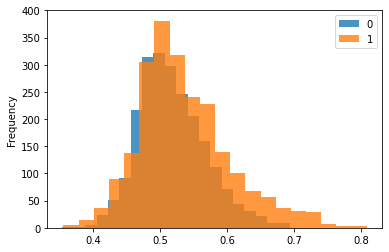

In [108]:
def gen_pscore(data, outcome, covariates):
    model = sm.Logit(outcome, covariates)
    result = model.fit()
    data['pscore'] = result.predict(covariates)
    data.groupby([categorize_treatment]).pscore.plot(kind='hist', bins=20, alpha=0.8, legend=True)

gen_pscore(df_mental, df_mental[categorize_treatment], df_mental[['Some college raw value', 'Median household income raw value']] )

In [109]:
def trim(data):
    control_data = data[data[categorize_treatment] == 0]
    treat_data = data[data[categorize_treatment] == 1]

    min_control, min_treat = control_data.pscore.min(), treat_data.pscore.min()
    max_control, max_treat = control_data.pscore.max(), treat_data.pscore.max()

    min_support = max(min_control, min_treat)
    max_support = min(max_control, max_treat)

    trim_data = data.loc[((data.pscore >= min_support) & (data.pscore <= max_support)),:]

    return trim_data

trim_df = trim(df_mental)
trim_df.groupby([categorize_treatment]).pscore.describe()

,count,mean,std,min,25%,50%,75%,max
unemployment_treated,,,,,,,,
0,2232.0,0.518530,0.050246,0.386830,0.482506,0.512203,0.549292,0.694137
1,2153.0,0.529416,0.060269,0.355609,0.488260,0.522402,0.567981,0.689551


### Perform nearest-neighbor matching

In [110]:
def Nearest_Neighbor_Pair(treated_df, non_treated_df):
    treated_x = treated_df['pscore'].values
    non_treated_x = non_treated_df['pscore'].values

    nbrs = NearestNeighbors(n_neighbors=1).fit(np.expand_dims(non_treated_x, axis= 1))
    distances, indices = nbrs.kneighbors(np.expand_dims(treated_x, axis= 1))
    indices = indices.reshape(indices.shape[0])
    matched = non_treated_df.iloc[indices]
    return matched

treated = trim_df[trim_df[categorize_treatment] == 1]
non_treated = trim_df[trim_df[categorize_treatment] == 0]
matched_df = Nearest_Neighbor_Pair(treated, non_treated)
ATE = np.mean(treated['Poor mental health days raw value'].values - matched_df['Poor mental health days raw value'].values)
print('ATE from Nearest Neighbors Matching = {}'.format(round(ATE, 3)))

ATE from Nearest Neighbors Matching = -0.218


### Assess Balance

In [111]:
def compute_smd(covariates_table: pd.DataFrame, covariates: list, round_digits: int=4) -> pd.DataFrame:
    covariates_smds = []
    for var in covariates:
        covariates_values = covariates_table[var].values
        neg_mean = covariates_values[0, 0]
        neg_std = covariates_values[0, 1]
        pos_mean = covariates_values[1, 0]
        pos_std = covariates_values[1, 1]

        smd = (pos_mean - neg_mean) / np.sqrt((pos_std ** 2 + neg_std ** 2) / 2)
        smd = round(abs(smd), round_digits)
        covariates_smds.append(smd)

    return pd.DataFrame({'features': covariates, 'smd': covariates_smds})

In [112]:
covariates_list = ['Some college raw value', 'Median household income raw value']
agg_operations = {categorize_treatment: 'count'}
agg_operations.update({
    covariate: ['mean', 'std'] for covariate in covariates_list
})

# Combine treated and matched_df
covariates_table = pd.concat([treated, matched_df]).groupby(categorize_treatment).agg(agg_operations)
covariates_table.head()

unemployment_treated Some college raw value            \
                                    count                   mean       std   
unemployment_treated                                                         
0                                    2153               0.566797  0.089955   
1                                    2153               0.632762  0.097834   

                     Median household income raw value                
                                                  mean           std  
unemployment_treated                                                  
0                                         48855.415235  11851.587658  
1                                         53967.731537  12250.988289

In [113]:
# standardize mean difference, <= 0.25
covariates_smd = compute_smd(covariates_table, covariates_list)
print(covariates_smd)

                            features     smd
0             Some college raw value  0.7019
1  Median household income raw value  0.4242


### stratification matching

In [90]:
def stratified_matching(data):
    mybins = np.arange(0.0, 1.1, 0.1)
    mylabels = np.arange(1, 11)
    data['strata'] = pd.cut(data['pscore'], bins = mybins, labels = mylabels)

    # calculate the weights for each strata
    strata_w = data[data[categorize_treatment] == 1].groupby('strata').size()/data[data[categorize_treatment] == 1].groupby('strata').size().sum()

    # calculate the ATT for each strata
    strata_ate = data[data[categorize_treatment] == 1].groupby('strata')['Poor mental health days raw value'].mean() - data[data[categorize_treatment] == 0].groupby('strata')['Poor mental health days raw value'].mean()

    # stratefied matching estimate 
    stratefied_ate = (strata_w * strata_ate).sum()  
    print("The stratification matching estimate is {}".format(round(stratefied_ate, 3)))
    return strata_w, strata_ate
  
strata_w, strata_ate = stratified_matching(trim_df)

The stratification matching estimate is -0.182


C:\Users\alnli\AppData\Local\Temp/ipykernel_35484/3729324588.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['strata'] = pd.cut(data['pscore'], bins = mybins, labels = mylabels)


In [95]:
strata_w

strata
1     0.000000
2     0.000000
3     0.000000
4     0.042306
5     0.341702
6     0.423059
7     0.184565
8     0.008368
9     0.000000
10    0.000000
dtype: float64

In [106]:
trim_df.shape

(4379, 22)

Compute smd for strata 4~8

In [103]:
# Combine treated and matched_df
positions = (trim_df['strata'] >= 4) & (trim_df['strata'] <= 8)
covariates_table = (trim_df[positions]).groupby(categorize_treatment).agg(agg_operations)
covariates_table.head()

unemployment_treated Some college raw value            \
                                    count                   mean       std   
unemployment_treated                                                         
0                                    2228               0.568629  0.086724   
1                                    2151               0.632219  0.097340   

                     Median household income raw value                \
                                                  mean           std   
unemployment_treated                                                   
0                                         47205.623429   9962.248504   
1                                         53906.945607  12126.335696   

                          RUCC            
                          mean       std  
unemployment_treated                      
0                     2.587971  1.539155  
1                     2.494189  1.488511

In [104]:
# standardize mean difference, <= 0.25
covariates_smd = compute_smd(covariates_table, covariates_list)
print(covariates_smd)

                            features     smd
0             Some college raw value  0.6898
1  Median household income raw value  0.6039
2                               RUCC  0.0619


### Inverse Probability Weighted Matching (IPW)

In [101]:
def IPW_estimator(data, T, Y, P):
  ITT = (data[T] * data[Y])/data[P] - ((1 - data[T])* data[Y])/(1 - data[P])
  IPWE = ITT.mean()
  return IPWE 

round(IPW_estimator(trim_df, categorize_treatment, 'Poor mental health days raw value' , 'pscore'), 3)

-0.571

### Conclusion: Cannot use Unemployment